<a href="https://colab.research.google.com/github/Djim1309/matematicas/blob/main/Practica_2_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctica 2 Grafos
##2.1
 2.- El algoritmo de Dijkstra tiene la utilidad de encontrar el camino más corto desde el nodo 1 hasta un nodo designado, lo que no significa que sea la ruta que pase por menos vértices, sino la que en su totalidad pase por las aristas de menor peso  
 3.-Los nodos se etiquetan de tal forma que siguen esta estructura [distancia entre el nodo 1 y el nodo j, en nodo anterior] de esta forma se busca desde el primero la menor distancia posible en todos los vertices  
 4.- 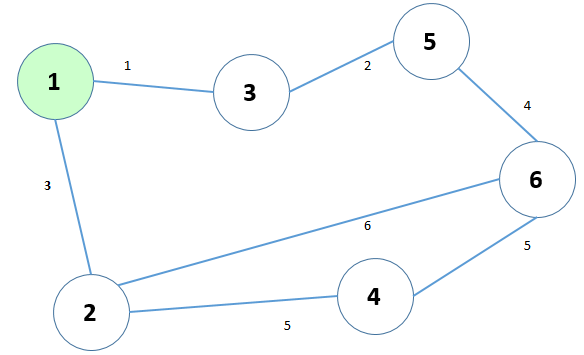

5.- 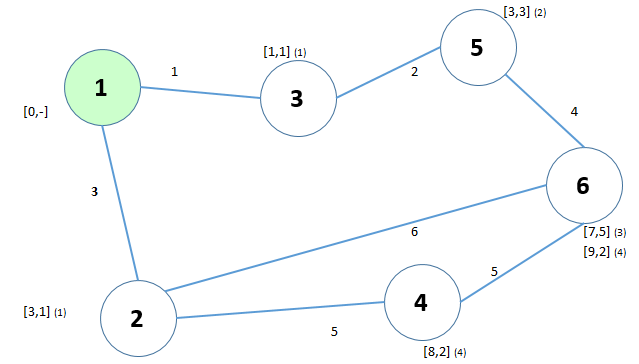

##2.3
https://www.techiedelight.com/es/single-source-shortest-paths-dijkstras-algorithm/

In [ ]:
import sys
from heapq import heappop, heappush
 
 
# Una clase para almacenar un nodo de heap
class Node:
    def __init__(self, vertex, weight=0):
        self.vertex = vertex
        self.weight = weight
 
    # Anule la función __lt__() para hacer que la clase `Node` funcione con un min-heap
    def __lt__(self, other):
        return self.weight < other.weight
 
 
# Una clase para representar un objeto graph
class Graph:
    def __init__(self, edges, n):
        # asigna memoria para la lista de adyacencia
        self.adjList = [[] for _ in range(n)]
 
        # agrega bordes al graph dirigido
        for (source, dest, weight) in edges:
            self.adjList[source].append((dest, weight))
 
 
def get_route(prev, i, route):
    if i >= 0:
        get_route(prev, prev[i], route)
        route.append(i)
 
 
# Ejecutar el algoritmo de Dijkstra en un graph dado
def findShortestPaths(graph, source, n):
 
    # crea un min-heap y empuja el nodo de origen con una distancia de 0
    pq = []
    heappush(pq, Node(source))
 
    # establece la distancia inicial desde la fuente a `v` como infinito
    dist = [sys.maxsize] * n
 
    # distancia de la fuente a sí mismo es cero
    dist[source] = 0
 
    # Lista # para rastrear vértices para los cuales ya se encontró el costo mínimo
    done = [False] * n
    done[source] = True
 
    # almacena el predecesor de un vértice (en una ruta de impresión)
    prev = [-1] * n
 
    # se ejecuta hasta que el min-heap esté vacío
    while pq:
 
        node = heappop(pq)      # Quitar y devolver el mejor vértice
        u = node.vertex         # obtener el número de vértice
 
        # hacer para cada vecino `v` de `u`
        for (v, weight) in graph.adjList[u]:
            if not done[v] and (dist[u] + weight) < dist[v]:        # Escalón de relajación
                dist[v] = dist[u] + weight
                prev[v] = u
                heappush(pq, Node(v, dist[v]))
 
        # marca el vértice `u` como hecho para que no se vuelva a recoger
        done[u] = True
 
    route = []
    for i in range(n):
        if i != source and dist[i] != sys.maxsize:
            get_route(prev, i, route)
            print(f'Path ({source} —> {i}): Minimum cost = {dist[i]}, Route = {route}')
            route.clear()
 
 
if __name__ == '__main__':
 
    # inicializa los bordes según el diagrama anterior
    # (u, v, w) representa la arista del vértice `u` al vértice `v` con peso `w`
    edges = [(0, 1, 70), (0, 4, 30), (1, 2, 25), (1, 4, 55), (2, 3, 92), (3, 2, 77),
            (4, 1, 100), (4, 2, 82), (4, 3, 12)]
 
    # número total de nodos en el graph (etiquetados de 0 a 4)
    n = 5
 
    # graph de construcción
    graph = Graph(edges, n)
 
    # ejecuta el algoritmo de Dijkstra desde cada nodo
    for source in range(n):
        findShortestPaths(graph, source, n)

Path (0 —> 1): Minimum cost = 70, Route = [0, 1]
Path (0 —> 2): Minimum cost = 95, Route = [0, 1, 2]
Path (0 —> 3): Minimum cost = 42, Route = [0, 4, 3]
Path (0 —> 4): Minimum cost = 30, Route = [0, 4]
Path (1 —> 2): Minimum cost = 25, Route = [1, 2]
Path (1 —> 3): Minimum cost = 67, Route = [1, 4, 3]
Path (1 —> 4): Minimum cost = 55, Route = [1, 4]
Path (2 —> 3): Minimum cost = 92, Route = [2, 3]
Path (3 —> 2): Minimum cost = 77, Route = [3, 2]
Path (4 —> 1): Minimum cost = 100, Route = [4, 1]
Path (4 —> 2): Minimum cost = 82, Route = [4, 2]
Path (4 —> 3): Minimum cost = 12, Route = [4, 3]


##2.4

##2.5  

1.-Los árboles binarios son estructuras de datos que permiten hacer una búsqueda mucho mas rápida a través de datos ordenados 2 a 1  
2.-
- Recorrer el árbol en preorden significa partir de la raíz, dar prioridad a la izquierda y por ultimo la derecha
- Recorrer el árbol en inorden significa partir de el nodo que no tenga ningun otro a la izquierda, luego pasaría a la raiz y despues a la derecha 
- El recorrido en postorden comienza también en la izquierda pero deja la raíz para el final, dando mas prioridad a la derecha  
3.- 
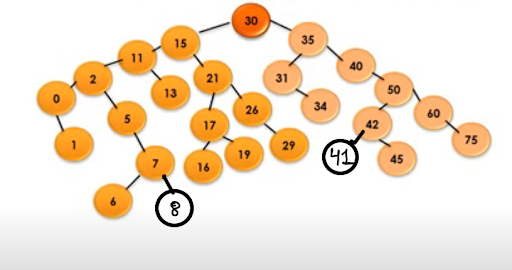  
Preorden: 30,15,11,2,0,1,5,7,6,8,13,21,17,16,19,26,29,35,31,34,40,50,42,41,45,60,75   
Inorden: 0,1,2,5,6,7,8,11,13,15,16,17,19,21,26,26,29,30,31,34,35,40,41,42,45,50,60,75  
Postorden: 1,0,6,7,8,5,2,13,11,16,19,17,29,26,21,15,34,31,41,45,42,75,60,50,40,35,30


##2.6
1.- Un camino hamiltoniano es un recorrido que pasa por todos los vértices de un grafo exactamente una vez  
2.- (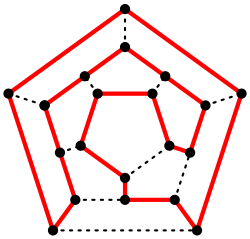  
2.- El camino hamiltoniano se podría usar por ejemplo en rutas de reparto de correos para pasar por todas los puntos de la forma mas eficiente  
https://www.youtube.com/watch?v=ueE7IAfLmqk&ab_channel=MathforAll  
https://www.youtube.com/watch?v=uWqp8rqY4Fs&ab_channel=PassItEDU  
https://www.youtube.com/watch?v=0gt9XewRqLo&ab_channel=UniversitatPolit%C3%A8cnicadeVal%C3%A8ncia-UPV  


##2.7
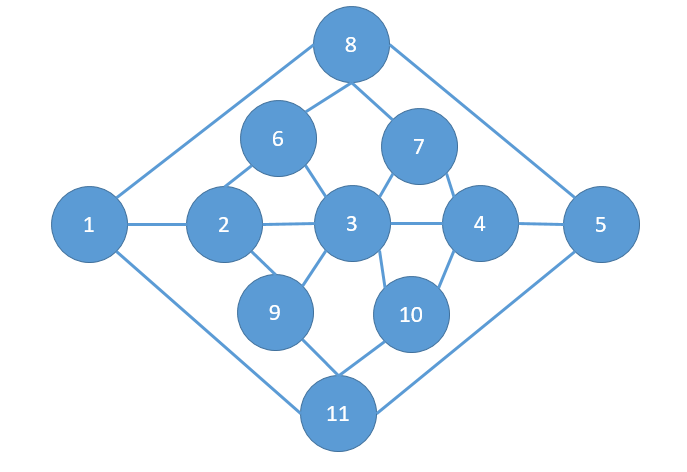  
2.- La soluciones que encuentro no se corresponden con un ciclo hamiltoniano, puesto que no vuelven al punto de inicio, son soluciones como:  
- 7, 4, 10, 3, 6, 2, 9, 11, 5, 8, 1
- 1-8-5-4-7-3-6-2-9-11-10
- 1-2-9-11-10-3-6-8-7-4-5

##2.8
1.- La ciudad de Königsberg está atravesada por el rio Pergolla, el cual se difurca y "crea" la isla Kneiphof, de forma que la ciudad se queda dividida en cuatro zonas que estaban unidas por siete puentes. El problema consistia en recorrer toda la ciudad pasando solo una vez por cada uno de los puentes y regresando al punto de inicio  
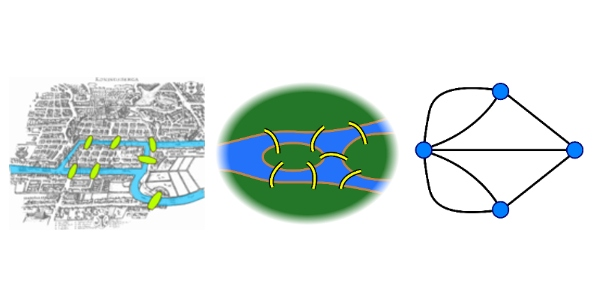  

2.- Euler fue un investigador que trabajo en la Academia Prusianan de las Ciencias, que junto con otros matematicos e investigadores hicieron de Königsberg un importante centro cientifico, aqui se extendio como juego este problema. Euler dio la negativa a la resolucion de este problema por el numero impar de puentes de esta ciudad, porque el requisito del problema de terminar en el inicio no es compatible con tener un numero impar de aristas en el grafo


##2.9
1.- Un camino euleriano es un recorrido que atraviesa cada arista del multigrafo exactamente una vez  
2.- Un ciclo euleriano es un recorrido cerrado que atraviesa cada arista del multigrafo exactamente una vez  
https://www.youtube.com/watch?v=w8d-4FyrbYk&ab_channel=MathforAll  
https://www.youtube.com/watch?v=57yhBHFCb7w&ab_channel=PassItEDU  


##2.10
1.-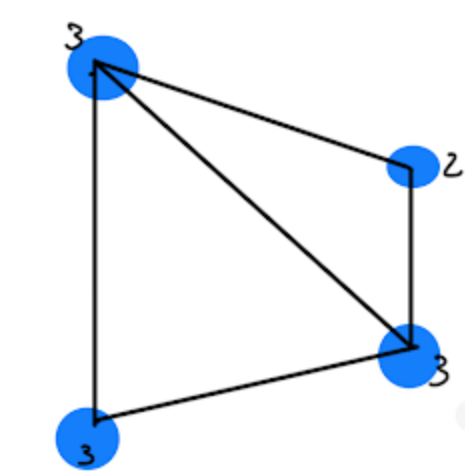  
2.-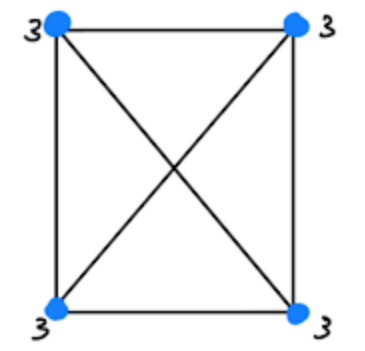